## Introduction
A local bike shop or local bicycle shop, sometimes abbreviated LBS, is a small business, as distinct from a chain, mail-order or online vendor, specializing in bicycle sale, maintenance and parts. We shall be analyzing an international Bike Shop in respect to their sales.

In [21]:
#import neccessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Accessing Data

In [5]:
# import the csv file
bike_sales= pd.read_csv(r"C:\Users\HP\Downloads\archive\Sales.csv")

In [22]:
#preview datasets
bike_sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),Male,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),Male,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),Male,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),Male,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),Female,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [7]:
bike_sales.shape

(113036, 18)

In [8]:
bike_sales.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

In [9]:
bike_sales.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Day,113036.0,15.665753,8.781567,1.0,8.0,16.0,23.0,31.0
Year,113036.0,2014.401739,1.272510,2011.0,2013.0,2014.0,2016.0,2016.0
Customer_Age,113036.0,35.919212,11.021936,17.0,28.0,35.0,43.0,87.0
Order_Quantity,113036.0,11.901660,9.561857,1.0,2.0,10.0,20.0,32.0
Unit_Cost,113036.0,267.296366,549.835483,1.0,2.0,9.0,42.0,2171.0
Unit_Price,113036.0,452.938427,922.071219,2.0,5.0,24.0,70.0,3578.0
Profit,113036.0,285.051665,453.887443,-30.0,29.0,101.0,358.0,15096.0
Cost,113036.0,469.318695,884.866118,1.0,28.0,108.0,432.0,42978.0
Revenue,113036.0,754.370360,1309.094674,2.0,63.0,223.0,800.0,58074.0


In [10]:
bike_sales.describe(include='O')

,Date,Month,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product
count,113036,113036,113036,113036,113036,113036,113036,113036,113036
unique,1884,12,4,2,6,53,3,17,130
top,2014-03-01,June,Adults (35-64),M,United States,California,Accessories,Tires and Tubes,Water Bottle - 30 oz.
freq,288,11234,55824,58312,39206,22450,70120,33870,10794


In [11]:
bike_sales.isna().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

# Data Wrangling

In [12]:
# replace gender column values 'M' and 'F' with 'Male'and 'Female'
bike_sales['Customer_Gender'].replace('M', 'Male', inplace =True)
bike_sales['Customer_Gender'].replace('F', 'Female', inplace =True)

# Exploratory Data Analysis (EDA)

In [20]:
#what is the gender disribution
bike_sales['Customer_Gender'].value_counts()

Male      58312
Female    54724
Name: Customer_Gender, dtype: int64

In [9]:
# what is the age distribution of the customers
bike_sales['Age_Group'].value_counts(ascending=False)

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

<AxesSubplot:title={'center':'Age Distribution'}, ylabel='Age_Group'>

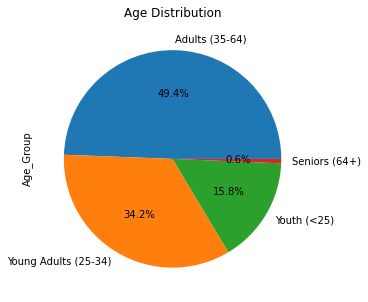

In [15]:
bike_sales['Age_Group'].value_counts(ascending=False).plot(kind='pie',shadow=False, autopct='%.1f%%',figsize=(10,5), title='Age Distribution')

In [58]:
# what is the most profitable year
bike_sales.groupby('Year')['Profit'].sum().sort_values(ascending= False)

Year
2015    7528563
2016    7035948
2013    5959208
2014    5864087
2012    2951993
2011    2881301
Name: Profit, dtype: int64

In [88]:
bike_sales.pivot_table(index='Year', columns='Month', values='Profit', aggfunc=np.sum, margins=True)

Month,April,August,December,February,January,July,June,March,May,November,October,September,All
Year,,,,,,,,,,,,,
2011,223601.0,285831.0,369192.0,207144.0,212849.0,288528.0,215029.0,226404.0,234689.0,181971.0,222507.0,213556.0,2881301
2012,236763.0,300608.0,360955.0,209113.0,211281.0,278194.0,226035.0,235084.0,245256.0,191771.0,236188.0,220745.0,2951993
2013,153803.0,751230.0,1200023.0,159939.0,143278.0,444939.0,175079.0,154707.0,196359.0,908884.0,841998.0,828969.0,5959208
2014,915671.0,NaN,NaN,800921.0,824846.0,263498.0,1119924.0,873053.0,1066174.0,NaN,NaN,NaN,5864087
2015,237588.0,876535.0,1479542.0,220611.0,219194.0,609952.0,258864.0,236086.0,297294.0,1105887.0,1000619.0,986391.0,7528563
2016,1097293.0,NaN,NaN,964594.0,1007073.0,254639.0,1388652.0,1036532.0,1287165.0,NaN,NaN,NaN,7035948
All,2864719.0,2214204.0,3409712.0,2562322.0,2618521.0,2139750.0,3383583.0,2761866.0,3326937.0,2388513.0,2301312.0,2249661.0,32221100


<AxesSubplot:ylabel='Year'>

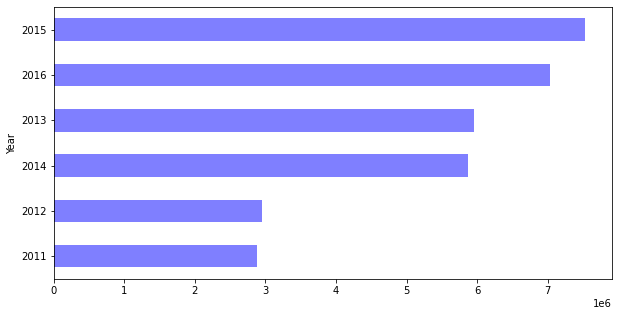

In [60]:
bike_sales.groupby('Year')['Profit'].sum().sort_values(ascending= True).plot(kind='barh', alpha=0.5, figsize=(10,5), color='Blue')

In [18]:
# what is the most profitable month
bike_sales.groupby(['Month','Year'])['Profit'].sum().sort_values(ascending= False)

Month     Year
December  2015    1479542
June      2016    1388652
May       2016    1287165
December  2013    1200023
June      2014    1119924
                   ...   
          2013     175079
February  2013     159939
March     2013     154707
April     2013     153803
January   2013     143278
Name: Profit, Length: 62, dtype: int64

<AxesSubplot:title={'center':'Monthly Profits from 2011 to 2016'}, xlabel='Month,Year'>

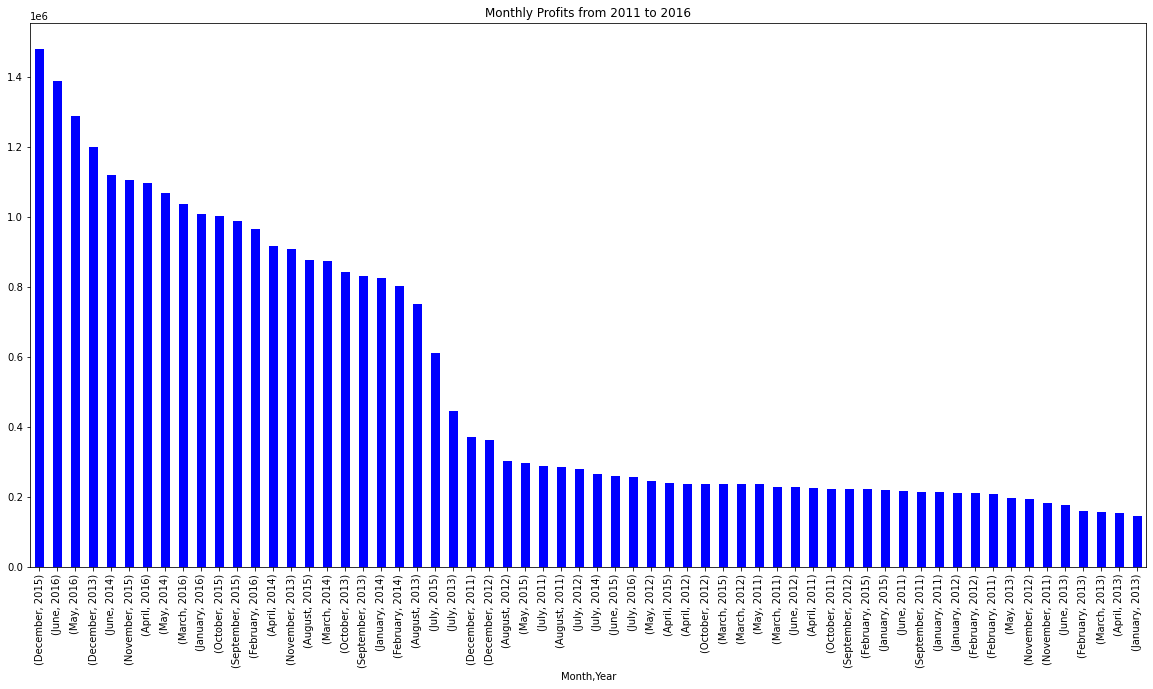

In [69]:
bike_sales.groupby(['Month','Year'])['Profit'].sum().sort_values(ascending= False).plot(kind='bar', title='Monthly Profits from 2011 to 2016', figsize=(20,10), color='Blue')

In [19]:
#Gender with the most orders
bike_sales.groupby('Customer_Gender')['Order_Quantity'].sum().sort_values(ascending=False)

Customer_Gender
Male      699583
Female    645733
Name: Order_Quantity, dtype: int64

<AxesSubplot:title={'center':'Quantity order by Gender'}>

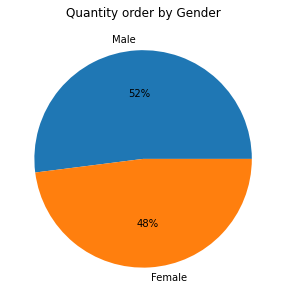

In [71]:
bike_sales.groupby('Customer_Gender')['Order_Quantity'].sum().sort_values(ascending=False).plot(kind='pie', figsize=(10,5), autopct='%.0f%%', title='Quantity order by Gender', ylabel='')

In [73]:
# Which country generates the highest revenue
bike_sales.groupby('Country')['Revenue'].sum().sort_values(ascending=False)

Country
United States     27975547
Australia         21302059
United Kingdom    10646196
Germany            8978596
France             8432872
Canada             7935738
Name: Revenue, dtype: int64

<AxesSubplot:title={'center':'Top Ranked Countries By Revenue'}>

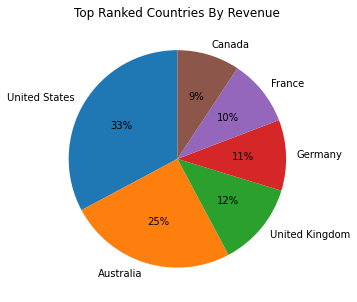

In [79]:
bike_sales.groupby('Country')['Revenue'].sum().sort_values(ascending=False).plot(kind='pie', figsize=(20,5), autopct='%.0f%%', title='Top Ranked Countries By Revenue',startangle=90, ylabel="")

In [81]:
# Which State generates the highest revenue
bike_sales.groupby('State')['Revenue'].sum().sort_values(ascending=False).head(10)

State
California          17672620
England             10646196
New South Wales      9203495
British Columbia     7877890
Washington           6741510
Queensland           5066267
Victoria             5054839
Oregon               3450410
Hessen               2073391
Saarland             2029545
Name: Revenue, dtype: int64

<AxesSubplot:title={'center':'States by Revenue'}, xlabel='State', ylabel='Revenue'>

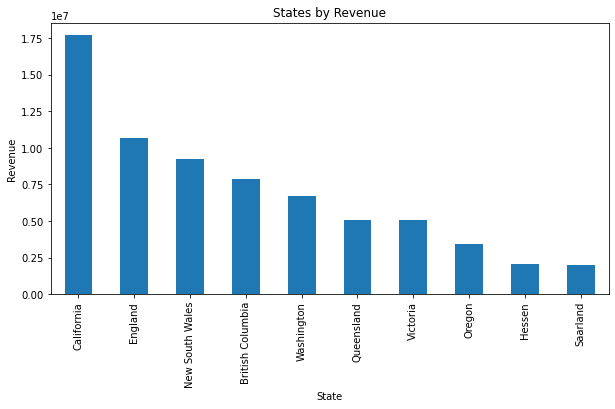

In [84]:
bike_sales.groupby('State')['Revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,5), ylabel='Revenue', title='States by Revenue')

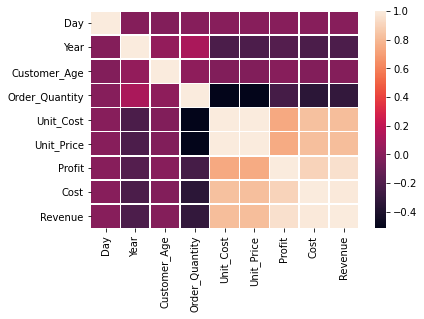

In [97]:
#correlation
correlations= bike_sales.corr()
sns.heatmap(correlations, linewidth =0.5)
plt.show()

## Conclusions

### Exploratory Data Analysis (EDA)
In this phase, i used several mathematical tools and packages to explore and analyze my data, i made use of different visualization graphs to clearly demostrate relationships between variables, findings are explained below;

- They seem to be more male customers(51.6%) than female customers(48.4%)
- In terms of age group, Adults(35-64) was the most popular age group with over 49.4% of the entire population, while Seniors(64 and above) patronized the company ther least(0.6%)
- In terms of yearof operations, 2015 was the most profitable year,with the company grosssing 7,528,563, while the December 2015 saw the highest ever monthly sales(1,479,542) This could be as a result of the holidays in December.
- Within the time frame of 2011 to 2015, United States of America(USA) generated the highest revenue 27,975,547, which is approximately 33% of the entire countries revenue, Canada was the least as it generated only 7,935,738.
- The city of California generated the highest revenue in terms of state.


### Limitations
- There was no limitations working with this dataset.